## Импортируем библиотеки

In [1]:
# import библиотек
import pandas as pd
import numpy as np
import pandas_profiling
# для работы с датами, временем
from datetime import timedelta
import datetime as dt

# для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
import seaborn as sns

## Загружаем датасет

In [2]:
data_var = pd.read_csv("HW1_var_3.csv",sep=";")

In [3]:
df = data_var.drop(['Номер варианта'], axis=1) # убираем колонку с номером варианта для удобства

## Разведочный анализ данных

In [4]:
df.shape # смотрим размер таблицы

(10243, 43)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head() # смотрим на данные

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000003,Поступление зарплаты на счет,Ремонт,0,0.50,мужской,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000023,2НДФЛ,Ремонт,0,0.54,женский,0,0,высшее,специалист,...,2.0,9.0,94.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1000043,Свободная форма с печатью работодателя,Ремонт,1,0.57,мужской,2,0,высшее,менеджер среднего звена,...,1.0,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000063,Форма банка (без печати работодателя),Покупка автомобиля,0,0.56,женский,2,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000083,Поступление зарплаты на счет,Ремонт,1,0.35,мужской,1,0,среднее,рабочий,...,1.0,24.0,106.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.columns.values # список колонок

array(['ID', 'INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG',
       'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER',
       'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG',
       'Period_at_work', 'age', 'EMPL_PROPERTY', 'EMPL_FORM',
       'FAMILY_STATUS', 'max90days', 'max60days', 'max30days',
       'max21days', 'max14days', 'avg_num_delay', 'if_zalog',
       'num_AccountActive180', 'num_AccountActive90',
       'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll',
       'numAccountClosed', 'sum_of_paym_months', 'all_credits',
       'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year',
       'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage',
       'sixty_vintage', 'ninety_vintage'], dtype=object)

In [8]:
# выводим числовые переменные  
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['ID',
 'INSURANCE_FLAG',
 'DTI',
 'FULL_AGE_CHILD_NUMBER',
 'DEPENDANT_NUMBER',
 'BANKACCOUNT_FLAG',
 'Period_at_work',
 'age',
 'max90days',
 'max60days',
 'max30days',
 'max21days',
 'max14days',
 'avg_num_delay',
 'if_zalog',
 'num_AccountActive180',
 'num_AccountActive90',
 'num_AccountActive60',
 'Active_to_All_prc',
 'numAccountActiveAll',
 'numAccountClosed',
 'sum_of_paym_months',
 'all_credits',
 'Active_not_cc',
 'own_closed',
 'min_MnthAfterLoan',
 'max_MnthAfterLoan',
 'dlq_exist',
 'thirty_in_a_year',
 'sixty_in_a_year',
 'ninety_in_a_year',
 'thirty_vintage',
 'sixty_vintage',
 'ninety_vintage']

In [9]:
# выводим категориальные переменные
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['INCOME_BASE_TYPE',
 'CREDIT_PURPOSE',
 'SEX',
 'EDUCATION',
 'EMPL_TYPE',
 'EMPL_SIZE',
 'EMPL_PROPERTY',
 'EMPL_FORM',
 'FAMILY_STATUS']

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

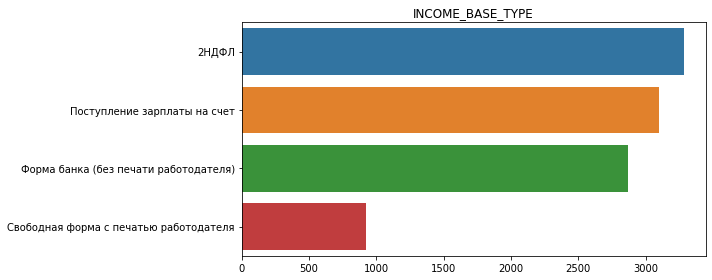

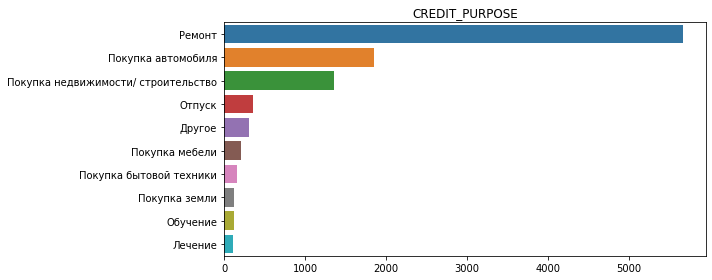

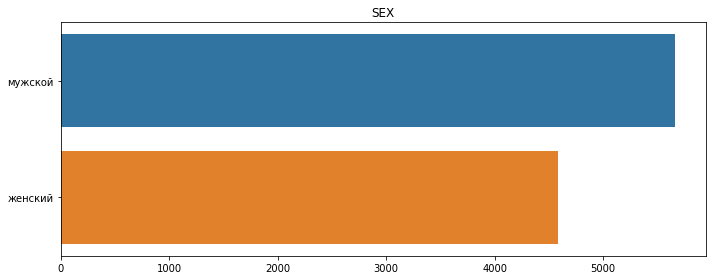

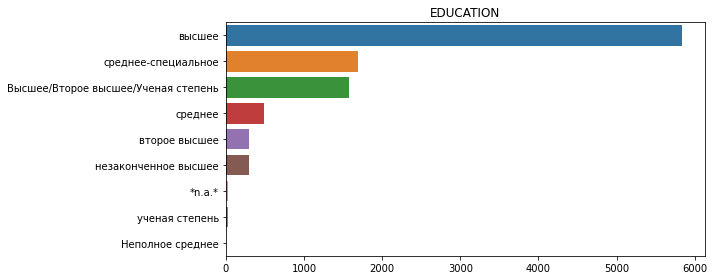

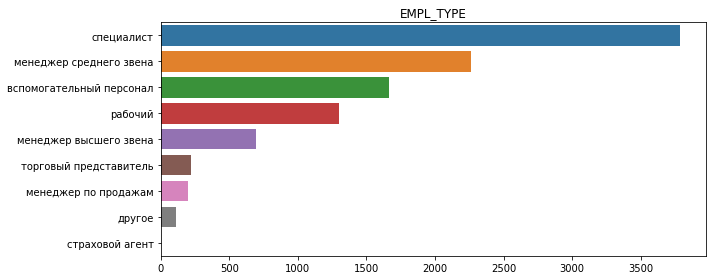

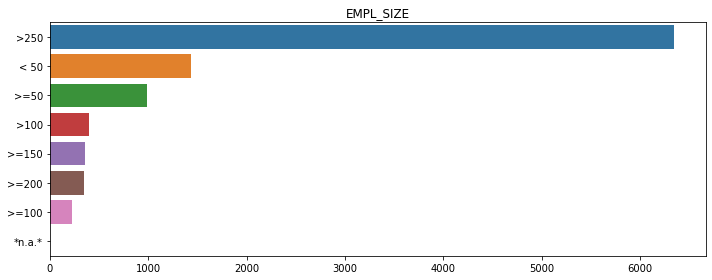

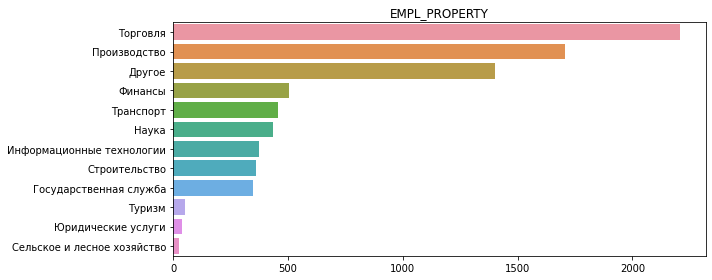

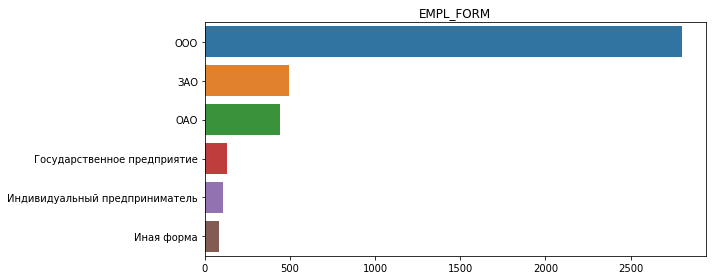

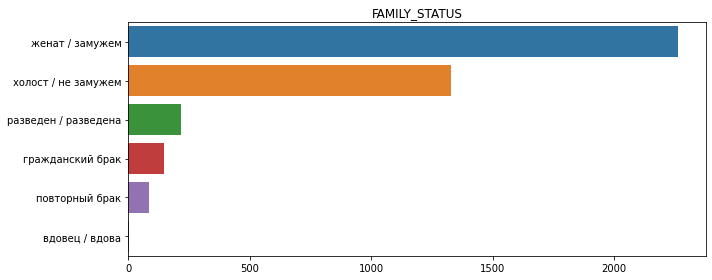

In [10]:
# отображаем категориальные переменные на гистограмме
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [11]:
df.info() # количество значений, null-условие, тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10243 non-null  int64  
 1   INCOME_BASE_TYPE       10172 non-null  object 
 2   CREDIT_PURPOSE         10243 non-null  object 
 3   INSURANCE_FLAG         10243 non-null  int64  
 4   DTI                    10119 non-null  float64
 5   SEX                    10243 non-null  object 
 6   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 7   DEPENDANT_NUMBER       10243 non-null  int64  
 8   EDUCATION              10242 non-null  object 
 9   EMPL_TYPE              10236 non-null  object 
 10  EMPL_SIZE              10120 non-null  object 
 11  BANKACCOUNT_FLAG       7912 non-null   float64
 12  Period_at_work         7911 non-null   float64
 13  age                    7912 non-null   float64
 14  EMPL_PROPERTY          7912 non-null   object 
 15  EM

In [12]:
df.describe()

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,1.024300e+04,10243.000000,10119.000000,10243.000000,10243.000000,7912.000000,7911.000000,7912.000000,3990.000000,3990.000000,...,3729.000000,3729.000000,3729.00000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
mean,1.102423e+06,0.597872,0.385700,0.562238,0.003710,0.381699,65.838706,36.275278,1.638095,1.158647,...,0.745240,13.681684,61.76428,0.567176,0.148297,0.085278,0.067310,0.034326,0.017431,0.016626
std,5.914087e+04,0.490352,0.136753,0.768896,0.071157,0.858845,65.257307,8.632238,1.870555,1.561361,...,1.102813,14.799728,30.69886,0.495533,0.355442,0.279332,0.250592,0.182088,0.130888,0.127884
min,1.000003e+06,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000,23.000000,0.000000,0.000000,...,0.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.051213e+06,0.000000,0.280000,0.000000,0.000000,0.000000,20.000000,29.000000,0.000000,0.000000,...,0.000000,4.000000,35.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.102423e+06,1.000000,0.400000,0.000000,0.000000,0.000000,45.000000,34.000000,1.000000,1.000000,...,0.000000,9.000000,68.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.153633e+06,1.000000,0.490000,1.000000,0.000000,0.000000,87.000000,42.000000,2.000000,2.000000,...,1.000000,18.000000,87.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.204843e+06,1.000000,0.610000,4.000000,2.000000,4.000000,514.000000,60.000000,20.000000,20.000000,...,10.000000,115.000000,177.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Высчитываем общее количество значений по колонкам, среднее значение, стандартное отклонение, минимум, максимум, медиану

In [13]:
df.describe(include='all')

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
count,1.024300e+04,10172,10243,10243.000000,10119.000000,10243,10243.000000,10243.000000,10242,10236,...,3729.000000,3729.000000,3729.00000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000
unique,NaN,4,10,NaN,NaN,2,NaN,NaN,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2НДФЛ,Ремонт,NaN,NaN,мужской,NaN,NaN,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3281,5667,NaN,NaN,5661,NaN,NaN,5838,3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.102423e+06,NaN,NaN,0.597872,0.385700,NaN,0.562238,0.003710,NaN,NaN,...,0.745240,13.681684,61.76428,0.567176,0.148297,0.085278,0.067310,0.034326,0.017431,0.016626
std,5.914087e+04,NaN,NaN,0.490352,0.136753,NaN,0.768896,0.071157,NaN,NaN,...,1.102813,14.799728,30.69886,0.495533,0.355442,0.279332,0.250592,0.182088,0.130888,0.127884
min,1.000003e+06,NaN,NaN,0.000000,0.020000,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.051213e+06,NaN,NaN,0.000000,0.280000,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,4.000000,35.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.102423e+06,NaN,NaN,1.000000,0.400000,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,9.000000,68.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.153633e+06,NaN,NaN,1.000000,0.490000,NaN,1.000000,0.000000,NaN,NaN,...,1.000000,18.000000,87.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Исследуем значения

<AxesSubplot:>

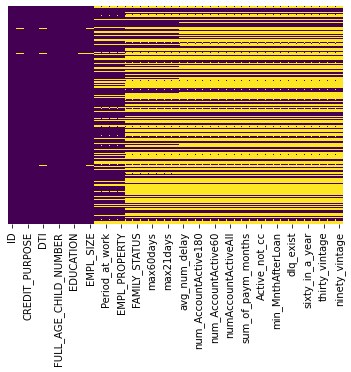

In [14]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis') # распределение пустых значений на графике

In [15]:
df.isna().sum() # вычисляем количество пустых значений

ID                          0
INCOME_BASE_TYPE           71
CREDIT_PURPOSE              0
INSURANCE_FLAG              0
DTI                       124
SEX                         0
FULL_AGE_CHILD_NUMBER       0
DEPENDANT_NUMBER            0
EDUCATION                   1
EMPL_TYPE                   7
EMPL_SIZE                 123
BANKACCOUNT_FLAG         2331
Period_at_work           2332
age                      2331
EMPL_PROPERTY            2331
EMPL_FORM                6196
FAMILY_STATUS            6196
max90days                6253
max60days                6253
max30days                6253
max21days                6253
max14days                6253
avg_num_delay            6527
if_zalog                 6514
num_AccountActive180     6514
num_AccountActive90      6514
num_AccountActive60      6514
Active_to_All_prc        6514
numAccountActiveAll      6514
numAccountClosed         6514
sum_of_paym_months       6514
all_credits              6514
Active_not_cc            6514
own_closed

In [16]:
percent_missing = df.isna().sum() * 100 / len(df) # доля пустых значений в % от общего количества
print(percent_missing)

ID                        0.000000
INCOME_BASE_TYPE          0.693156
CREDIT_PURPOSE            0.000000
INSURANCE_FLAG            0.000000
DTI                       1.210583
SEX                       0.000000
FULL_AGE_CHILD_NUMBER     0.000000
DEPENDANT_NUMBER          0.000000
EDUCATION                 0.009763
EMPL_TYPE                 0.068339
EMPL_SIZE                 1.200820
BANKACCOUNT_FLAG         22.757005
Period_at_work           22.766768
age                      22.757005
EMPL_PROPERTY            22.757005
EMPL_FORM                60.490091
FAMILY_STATUS            60.490091
max90days                61.046568
max60days                61.046568
max30days                61.046568
max21days                61.046568
max14days                61.046568
avg_num_delay            63.721566
if_zalog                 63.594650
num_AccountActive180     63.594650
num_AccountActive90      63.594650
num_AccountActive60      63.594650
Active_to_All_prc        63.594650
numAccountActiveAll 

In [17]:
df.nunique() # вычисляем количество уникальных значений

ID                       10243
INCOME_BASE_TYPE             4
CREDIT_PURPOSE              10
INSURANCE_FLAG               2
DTI                         60
SEX                          2
FULL_AGE_CHILD_NUMBER        5
DEPENDANT_NUMBER             3
EDUCATION                    9
EMPL_TYPE                    9
EMPL_SIZE                    8
BANKACCOUNT_FLAG             5
Period_at_work             361
age                         38
EMPL_PROPERTY               12
EMPL_FORM                    6
FAMILY_STATUS                6
max90days                   19
max60days                   15
max30days                   16
max21days                   14
max14days                   12
avg_num_delay             1152
if_zalog                     2
num_AccountActive180         6
num_AccountActive90          5
num_AccountActive60          4
Active_to_All_prc           99
numAccountActiveAll         13
numAccountClosed            26
sum_of_paym_months         326
all_credits                 31
Active_n

- Среди уникальных идентификаторов ID нет повторяющихся значений

In [18]:
percent_unique = df.nunique() * 100 / len(df) # доля уникальных значений в % от общего количества
print(percent_unique)

ID                       100.000000
INCOME_BASE_TYPE           0.039051
CREDIT_PURPOSE             0.097628
INSURANCE_FLAG             0.019526
DTI                        0.585766
SEX                        0.019526
FULL_AGE_CHILD_NUMBER      0.048814
DEPENDANT_NUMBER           0.029288
EDUCATION                  0.087865
EMPL_TYPE                  0.087865
EMPL_SIZE                  0.078102
BANKACCOUNT_FLAG           0.048814
Period_at_work             3.524358
age                        0.370985
EMPL_PROPERTY              0.117153
EMPL_FORM                  0.058577
FAMILY_STATUS              0.058577
max90days                  0.185493
max60days                  0.146441
max30days                  0.156204
max21days                  0.136679
max14days                  0.117153
avg_num_delay             11.246705
if_zalog                   0.019526
num_AccountActive180       0.058577
num_AccountActive90        0.048814
num_AccountActive60        0.039051
Active_to_All_prc          0

In [19]:
df.isin([0]).sum() # рассчитываем количество нулевых значений

ID                           0
INCOME_BASE_TYPE             0
CREDIT_PURPOSE               0
INSURANCE_FLAG            4119
DTI                          0
SEX                          0
FULL_AGE_CHILD_NUMBER     6052
DEPENDANT_NUMBER         10212
EDUCATION                    0
EMPL_TYPE                    0
EMPL_SIZE                    0
BANKACCOUNT_FLAG          6214
Period_at_work               0
age                          0
EMPL_PROPERTY                0
EMPL_FORM                    0
FAMILY_STATUS                0
max90days                 1041
max60days                 1561
max30days                 1988
max21days                 2341
max14days                 2557
avg_num_delay             1601
if_zalog                  2527
num_AccountActive180      2628
num_AccountActive90       3202
num_AccountActive60       3397
Active_to_All_prc          496
numAccountActiveAll        483
numAccountClosed           434
sum_of_paym_months          14
all_credits                  0
Active_n

In [20]:
percent_zero = df.isin([0]).sum()  * 100 / len(df) # доля нулевых значений в % от общего количества
print(percent_zero)

ID                        0.000000
INCOME_BASE_TYPE          0.000000
CREDIT_PURPOSE            0.000000
INSURANCE_FLAG           40.212828
DTI                       0.000000
SEX                       0.000000
FULL_AGE_CHILD_NUMBER    59.084253
DEPENDANT_NUMBER         99.697354
EDUCATION                 0.000000
EMPL_TYPE                 0.000000
EMPL_SIZE                 0.000000
BANKACCOUNT_FLAG         60.665821
Period_at_work            0.000000
age                       0.000000
EMPL_PROPERTY             0.000000
EMPL_FORM                 0.000000
FAMILY_STATUS             0.000000
max90days                10.163038
max60days                15.239676
max30days                19.408376
max21days                22.854632
max14days                24.963390
avg_num_delay            15.630186
if_zalog                 24.670507
num_AccountActive180     25.656546
num_AccountActive90      31.260373
num_AccountActive60      33.164112
Active_to_All_prc         4.842331
numAccountActiveAll 

- У 40% клиентов нет страхования заемщика при получении кредита
- У 99,6% клиентов не содержат иждивенцев
- 60% клиентов не пользуются онлайн-кабинетом

In [21]:
# матрица корреляций
correlations = df.select_dtypes(include=['float64']).corr()
correlations

,DTI,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
DTI,1.000000,0.096259,0.043156,0.050394,0.083804,0.054306,0.037557,0.009272,-0.009289,0.015339,...,-0.049920,-0.218754,0.049255,0.101671,0.061704,0.052638,0.055281,0.023350,0.021613,-0.001064
BANKACCOUNT_FLAG,0.096259,1.000000,0.038246,-0.036408,0.059941,0.082519,0.102616,0.097527,0.126657,0.015954,...,-0.104576,-0.043652,-0.046099,-0.020641,0.027186,0.041208,0.024260,0.020138,0.037663,0.035442
Period_at_work,0.043156,0.038246,1.000000,0.388145,-0.041792,-0.035191,-0.038931,-0.022627,-0.025600,-0.075258,...,0.154965,0.047883,0.217335,0.010030,-0.038172,-0.046527,-0.041596,-0.018652,-0.020470,-0.006429
age,0.050394,-0.036408,0.388145,1.000000,-0.030742,-0.026952,-0.033369,-0.027650,-0.030321,-0.055807,...,0.071318,0.098124,0.296628,0.021493,-0.001879,0.002733,0.015599,-0.002748,-0.030788,-0.017246
max90days,0.083804,0.059941,-0.041792,-0.030742,1.000000,0.883760,0.789114,0.707535,0.607368,0.022590,...,-0.043566,-0.168163,0.043289,0.093391,0.070063,0.022984,0.027465,0.023452,-0.019363,-0.004464
max60days,0.054306,0.082519,-0.035191,-0.026952,0.883760,1.000000,0.903675,0.826076,0.714148,0.019419,...,-0.078029,-0.101417,0.029723,0.057998,0.046125,0.020359,0.024296,0.014996,-0.014367,0.007069
max30days,0.037557,0.102616,-0.038931,-0.033369,0.789114,0.903675,1.000000,0.915148,0.797055,0.026662,...,-0.101834,-0.056960,0.018723,0.058192,0.042426,0.016680,0.019690,0.015024,-0.011396,0.011727
max21days,0.009272,0.097527,-0.022627,-0.027650,0.707535,0.826076,0.915148,1.000000,0.893438,0.019509,...,-0.105099,-0.010392,-0.005311,0.037122,0.036357,0.013589,0.017318,0.012437,-0.008889,0.013754
max14days,-0.009289,0.126657,-0.025600,-0.030321,0.607368,0.714148,0.797055,0.893438,1.000000,0.014192,...,-0.102712,0.014284,-0.027777,0.021170,0.015972,0.010637,0.013913,0.001789,-0.010081,0.013930
avg_num_delay,0.015339,0.015954,-0.075258,-0.055807,0.022590,0.019419,0.026662,0.019509,0.014192,1.000000,...,-0.043616,0.037055,0.151490,0.479303,0.547534,0.521404,0.508144,0.332305,0.304583,0.311567


#### График корреляции значений

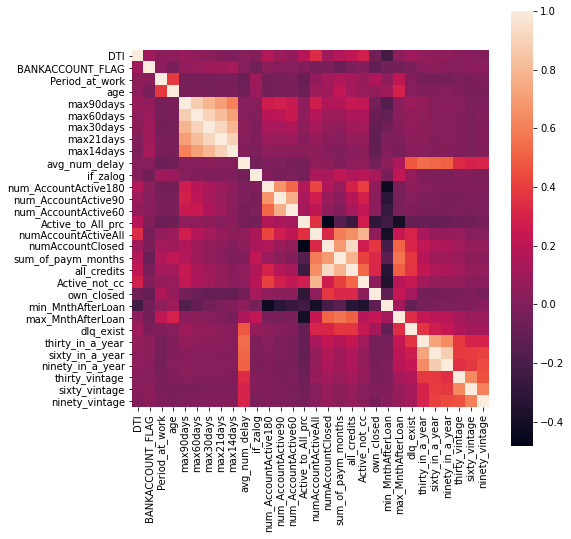

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlations, square=True)
plt.show()

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'INSURANCE_FLAG'}>,
        <AxesSubplot:title={'center':'DTI'}>,
        <AxesSubplot:title={'center':'FULL_AGE_CHILD_NUMBER'}>,
        <AxesSubplot:title={'center':'DEPENDANT_NUMBER'}>,
        <AxesSubplot:title={'center':'BANKACCOUNT_FLAG'}>],
       [<AxesSubplot:title={'center':'Period_at_work'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'max90days'}>,
        <AxesSubplot:title={'center':'max60days'}>,
        <AxesSubplot:title={'center':'max30days'}>,
        <AxesSubplot:title={'center':'max21days'}>],
       [<AxesSubplot:title={'center':'max14days'}>,
        <AxesSubplot:title={'center':'avg_num_delay'}>,
        <AxesSubplot:title={'center':'if_zalog'}>,
        <AxesSubplot:title={'center':'num_AccountActive180'}>,
        <AxesSubplot:title={'center':'num_AccountActive90'}>,
        <AxesSubplot:title={'center':'num_AccountActive60'}>],
       [<A

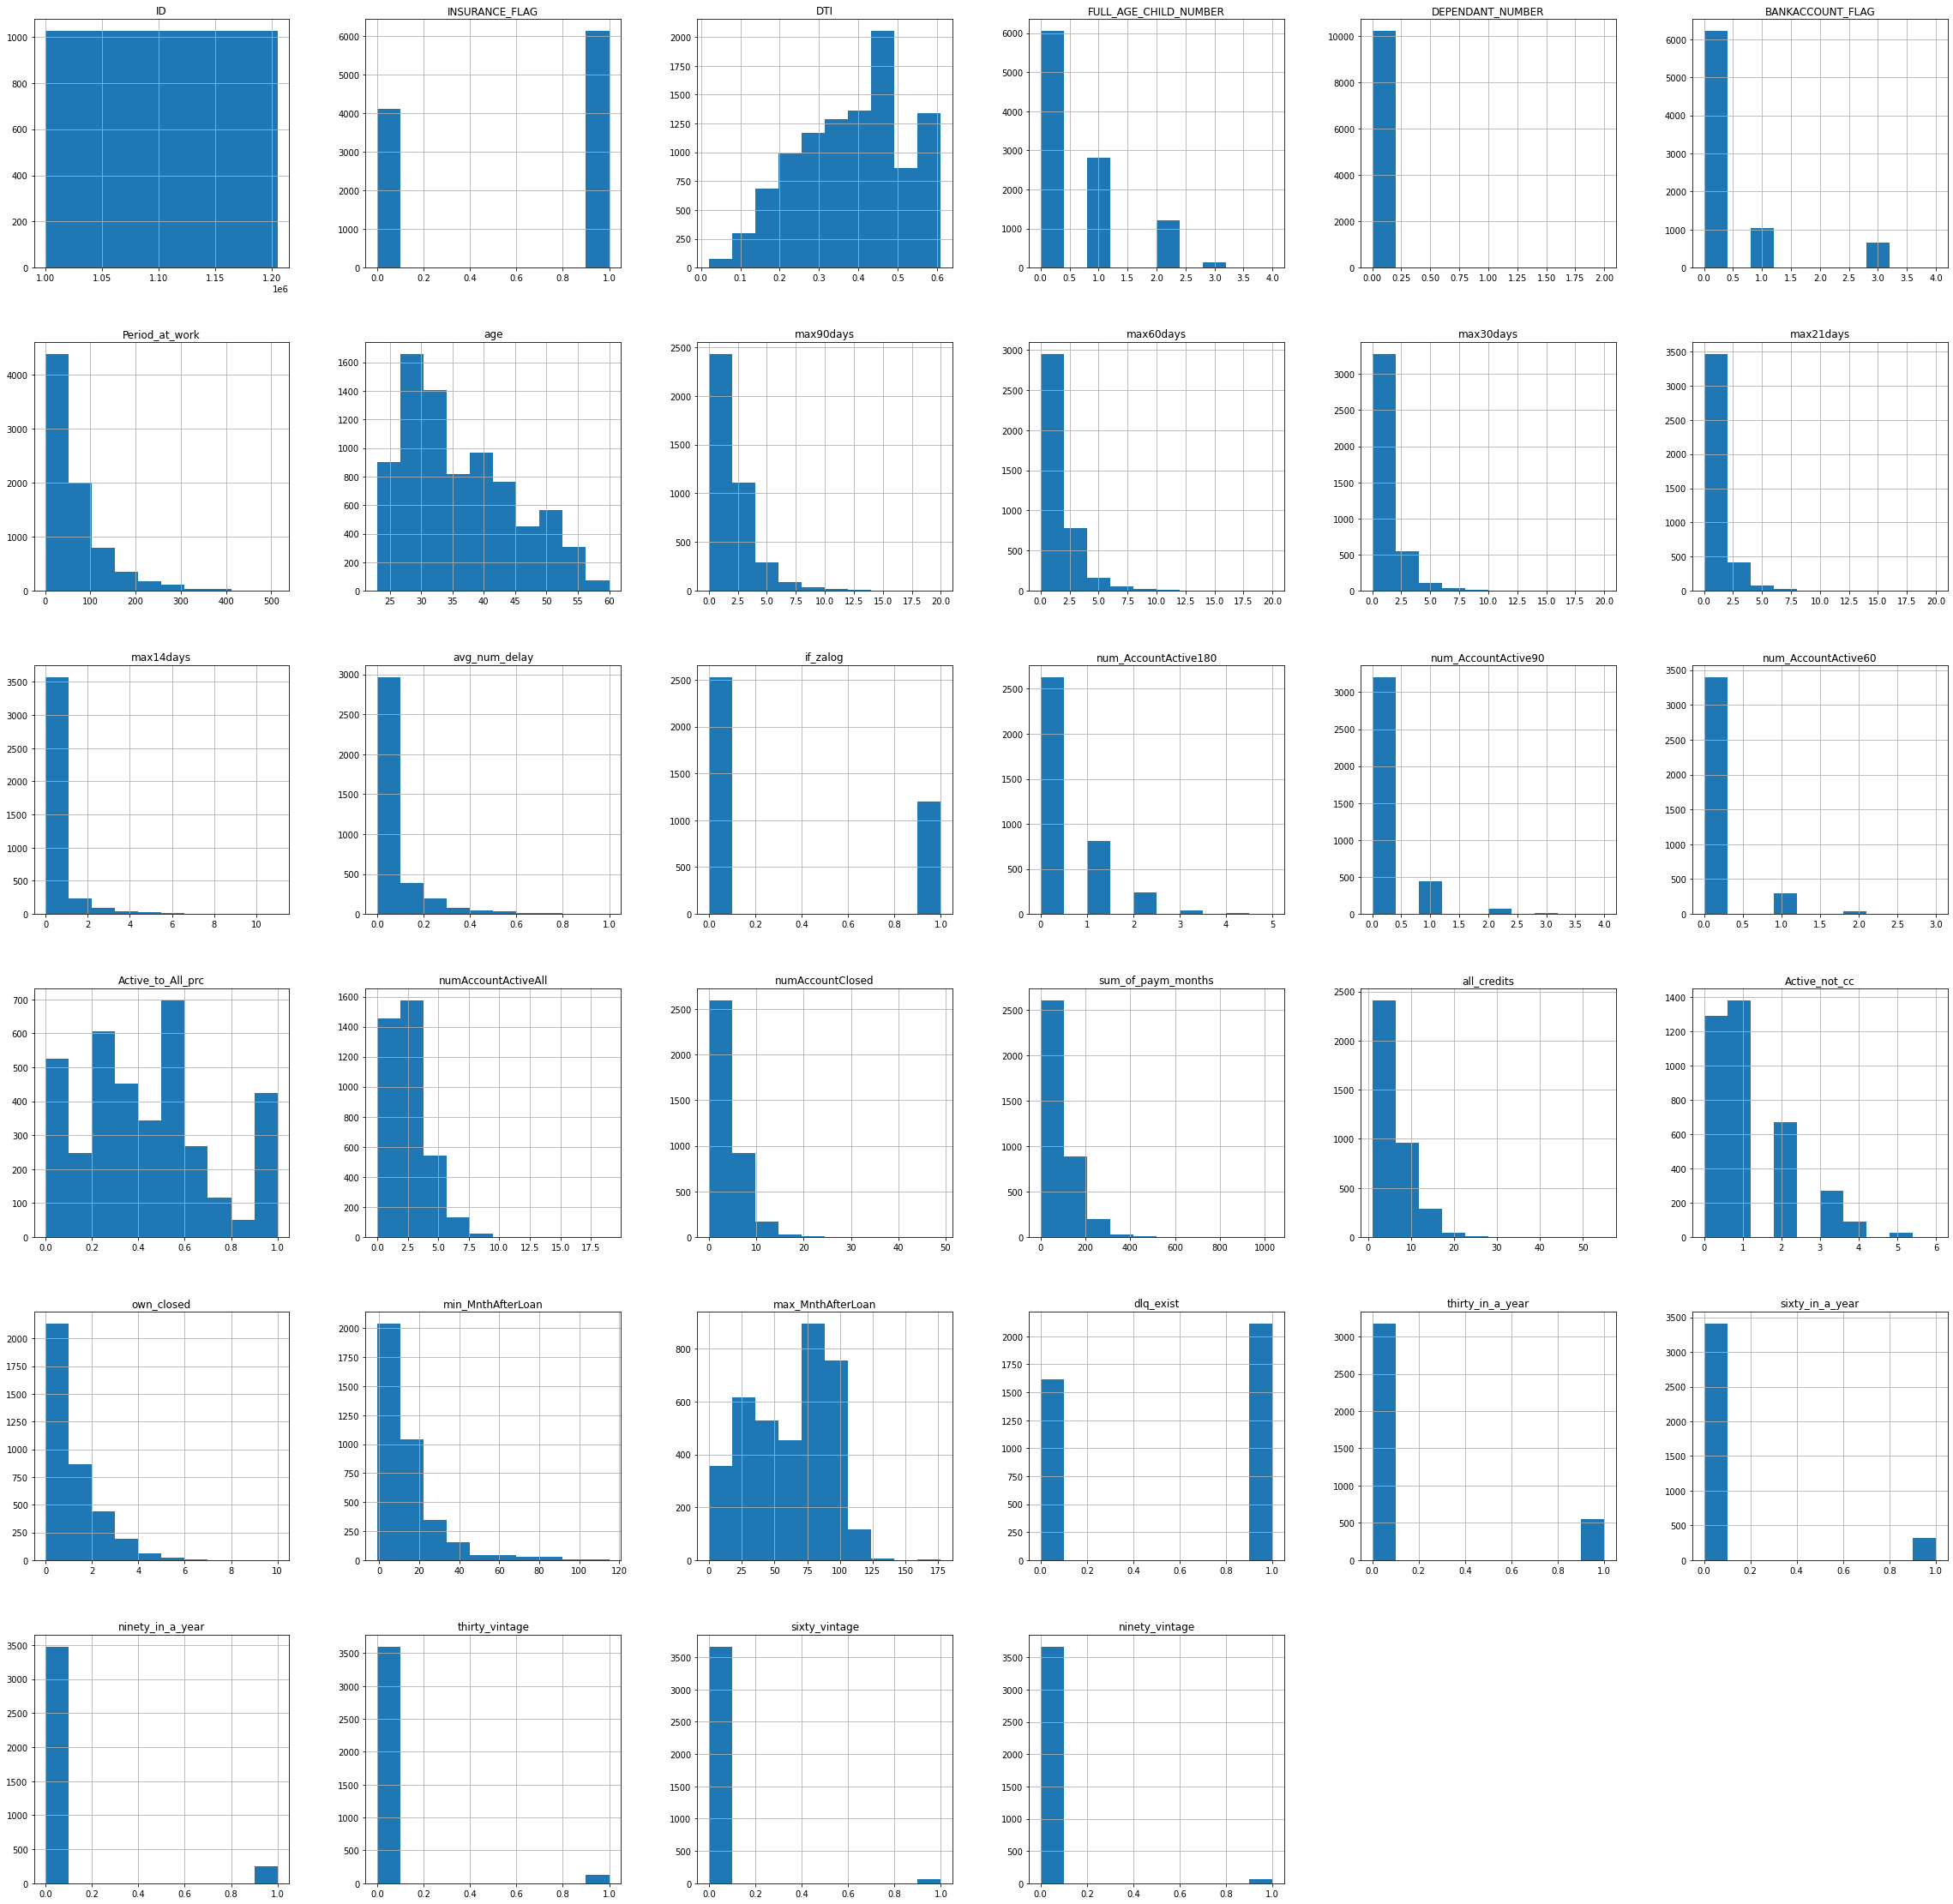

In [23]:
df.hist(figsize = (40, 40))

# Распределение данных по категориальным переменным

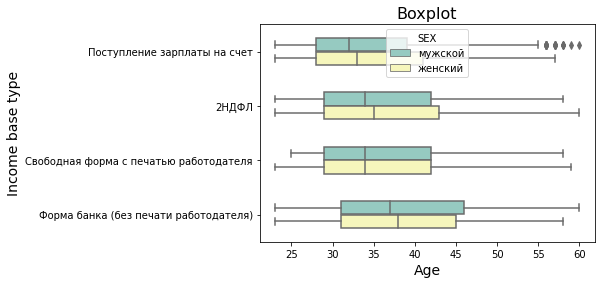

In [25]:
#  
bplot=sns.boxplot(x='age',y='INCOME_BASE_TYPE', hue='SEX',
                 data=df, 
                 width=0.5,
                 palette="Set3")
bplot.axes.set_title("Boxplot",
                    fontsize=16)
 
bplot.set_xlabel("Age", 
                fontsize=14)
 
bplot.set_ylabel("Income base type",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

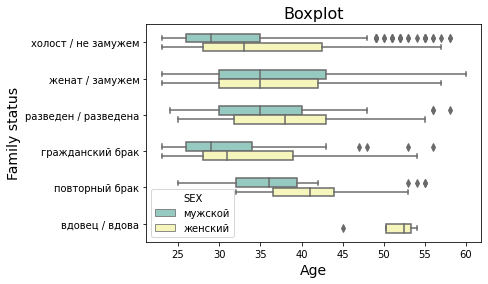

In [26]:
bplot=sns.boxplot(x='age',y='FAMILY_STATUS', hue='SEX',
                 data=df, 
                 width=0.5,
                 palette="Set3")
bplot.axes.set_title("Boxplot",
                    fontsize=16)
 
bplot.set_xlabel("Age", 
                fontsize=14)
 
bplot.set_ylabel("Family status",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

## Data Preprocessing

#### Проверяем пропущенные значения в категориальных переменных

- Сначала необходимо проверить категориальные переменные на наличие пустых значений. Пустые значения встречаются в таких колонках, как INCOME_BASE_TYPE, EDUCATION, EMPL_TYPE, EMPL_SIZE, EMPL_PROPERTY,  EMPL_FORM, FAMILY_STATUS
- Когда пропущенные значения есть среди категориальных переменных, необходимо либо выбросить эти значения, либо заменить соответствующей модой.

In [27]:
# Исключаем из колонки EDUCATION значения *n.a.*
df = df[df.EDUCATION != '*n.a.*']

In [28]:
# Исключаем из колонки EMPL_SIZE значения *n.a.*
df = df[df.EMPL_SIZE != '*n.a.*']

In [29]:
# Удаляем пропущенные значения в колонках EMPL_TYPE и EDUCATION
df = df.dropna(how='any', subset=['EMPL_TYPE', 'EDUCATION'])

- Заменяем пропущенные значения в оставшихся колонках на моду

In [30]:
# Заменяем пропущенные значения в INCOME_BASE_TYPE на моду
df['INCOME_BASE_TYPE'].value_counts()

2НДФЛ                                     3276
Поступление зарплаты на счет              3088
Форма банка (без печати работодателя)     2858
Свободная форма с печатью работодателя     921
Name: INCOME_BASE_TYPE, dtype: int64

In [31]:
incbase_cond_mode = df['INCOME_BASE_TYPE'].value_counts().index[0]

In [32]:
df['INCOME_BASE_TYPE'].fillna(incbase_cond_mode,inplace=True)

In [33]:
df['EMPL_SIZE'].value_counts()

>250     6338
< 50     1432
>=50      982
>100      402
>=150     361
>=200     348
>=100     229
Name: EMPL_SIZE, dtype: int64

In [34]:
empsize_cond_mode = df['EMPL_SIZE'].value_counts().index[0]

In [35]:
df['EMPL_SIZE'].fillna(incbase_cond_mode,inplace=True)

In [36]:
df['EMPL_PROPERTY'].value_counts()

Торговля                       2204
Производство                   1703
Другое                         1395
Финансы                         495
Транспорт                       455
Наука                           435
Информационные технологии       373
Строительство                   358
Государственная служба          350
Туризм                           54
Юридические услуги               37
Сельское и лесное хозяйство      26
Name: EMPL_PROPERTY, dtype: int64

In [37]:
empprop_cond_mode = df['EMPL_PROPERTY'].value_counts().index[0]

In [38]:
df['EMPL_PROPERTY'].fillna(empprop_cond_mode,inplace=True)

In [39]:
df['EMPL_FORM'].value_counts()

ООО                               2792
ЗАО                                493
ОАО                                436
Государственное предприятие        128
Индивидуальный предприниматель     106
Иная форма                          80
Name: EMPL_FORM, dtype: int64

In [40]:
empform_cond_mode = df['EMPL_FORM'].value_counts().index[0]

In [41]:
df['EMPL_FORM'].fillna(empform_cond_mode,inplace=True)

In [42]:
df['FAMILY_STATUS'].value_counts()

женат / замужем         2257
холост / не замужем     1326
разведен / разведена     216
гражданский брак         146
повторный брак            86
вдовец / вдова             4
Name: FAMILY_STATUS, dtype: int64

In [43]:
df['FAMILY_STATUS'].fillna('Unknown',inplace=True)

#### Проверяем числовые данные

- Если в числовых данных данные асимметричны, то заменяем пустые значения на среднее, если симметричны - заменяем на медиану

In [44]:
dti_mean = df['DTI'].mean()
df['DTI'].fillna(dti_mean,inplace=True)

In [45]:
act_mean = df['Active_to_All_prc'].mean()
df['Active_to_All_prc'].fillna(act_mean,inplace=True)

In [46]:
bankacc_median = df['BANKACCOUNT_FLAG'].median()
df['BANKACCOUNT_FLAG'].fillna(bankacc_median,inplace=True)

In [47]:
perwork_median = df['Period_at_work'].median()
df['Period_at_work'].fillna(perwork_median,inplace=True)

In [48]:
age_median = df['age'].median()
df['age'].fillna(age_median,inplace=True)

In [49]:
max90_mean = df['max90days'].median()
df['max90days'].fillna(max90_mean,inplace=True)

max60_median = df['max60days'].median()
df['max60days'].fillna(max60_median,inplace=True)

max30_median = df['max30days'].median()
df['max30days'].fillna(max30_median,inplace=True)

max21_median = df['max21days'].median()
df['max21days'].fillna(max21_median,inplace=True)

max14_median = df['max14days'].median()
df['max14days'].fillna(max14_median,inplace=True)

avgdelay_median = df['avg_num_delay'].median()
df['avg_num_delay'].fillna(avgdelay_median,inplace=True)

acc180_median = df['num_AccountActive180'].median()
df['num_AccountActive180'].fillna(acc180_median,inplace=True)

acc90_median = df['num_AccountActive90'].median()
df['num_AccountActive90'].fillna(acc90_median,inplace=True)

acc60_median = df['num_AccountActive60'].median()
df['num_AccountActive60'].fillna(acc60_median,inplace=True)

accall_median = df['numAccountActiveAll'].median()
df['numAccountActiveAll'].fillna(accall_median,inplace=True)

accall_median = df['numAccountActiveAll'].median()
df['numAccountActiveAll'].fillna(accall_median,inplace=True)

acccl_median = df['numAccountClosed'].median()
df['numAccountClosed'].fillna(acccl_median,inplace=True)

paym_median = df['sum_of_paym_months'].median()
df['sum_of_paym_months'].fillna(paym_median,inplace=True)

cred_median = df['all_credits'].median()
df['all_credits'].fillna(cred_median,inplace=True)

acnot_median = df['Active_not_cc'].median()
df['Active_not_cc'].fillna(acnot_median,inplace=True)

closed_median = df['own_closed'].median()
df['own_closed'].fillna(closed_median,inplace=True)

In [50]:
# boolean
zal_median = df['if_zalog'].median()
df['if_zalog'].fillna(zal_median,inplace=True)

dlq_median = df['dlq_exist'].median()
df['dlq_exist'].fillna(dlq_median,inplace=True)

- В колонке min_MnthAfterLoan были найдены недопустимые отрицательные значения, поэтому удаляем эту переменную из датасета.

In [51]:
df.drop(['min_MnthAfterLoan','max_MnthAfterLoan'], axis=1,inplace=True)

In [52]:
df.drop(['sixty_in_a_year','sixty_vintage','thirty_in_a_year','thirty_vintage','ninety_in_a_year','ninety_vintage'], axis=1,inplace=True)

In [53]:
df.drop(['ID'], axis=1,inplace=True)

In [54]:
df.isna().sum() # проверяем, что в финальной витрине нет пропущенных значений

INCOME_BASE_TYPE         0
CREDIT_PURPOSE           0
INSURANCE_FLAG           0
DTI                      0
SEX                      0
FULL_AGE_CHILD_NUMBER    0
DEPENDANT_NUMBER         0
EDUCATION                0
EMPL_TYPE                0
EMPL_SIZE                0
BANKACCOUNT_FLAG         0
Period_at_work           0
age                      0
EMPL_PROPERTY            0
EMPL_FORM                0
FAMILY_STATUS            0
max90days                0
max60days                0
max30days                0
max21days                0
max14days                0
avg_num_delay            0
if_zalog                 0
num_AccountActive180     0
num_AccountActive90      0
num_AccountActive60      0
Active_to_All_prc        0
numAccountActiveAll      0
numAccountClosed         0
sum_of_paym_months       0
all_credits              0
Active_not_cc            0
own_closed               0
dlq_exist                0
dtype: int64

In [55]:
#df.to_csv(r'D:\HSE\Programming\HW1_var3.csv', index = False,encoding="utf-8") # сохраняем готовую витрину данных в csv-файл